In [2]:
# Inverse mapping 

This tutorial shows an example of using inverse mapping to transform (i.e., warp) an image. Here, the image is a square on a black background. The transformation is a rotation but it could be any transformation (e.g., scaling, elastic warping). 

When transforming images, it is not enough to transform the coordinates. We also need to transfer the color of the pixels from the original image to the transformed image. This color transfer is done by an inverse-mapping procedure.    

This example was partially adapted from: 
http://scipy-lectures.github.io/advanced/image_processing/


SyntaxError: invalid syntax (<ipython-input-2-48f05bf21ccc>, line 3)

# Inverse mapping 

This tutorial shows an example of using inverse mapping to transform (i.e., warp) an image. Here, the image is a square on a black background. The transformation is a rotation but it could be any transformation (e.g., scaling, elastic warping). 

When transforming images, it is not enough to transform the coordinates. We also need to transfer the color of the pixels from the original image to the transformed image. This color transfer is done by an inverse-mapping procedure.    

This example was partially adapted from: 
http://scipy-lectures.github.io/advanced/image_processing/


In [1]:
# Ensures ipython shows images and results in line instead of all at the end of the notebook. 
%matplotlib inline

In [2]:
# Import all libraries that we will use
from scipy import ndimage
from scipy import misc
import matplotlib.pyplot as plt
import numpy  as np
import PIL
import imageio

In [14]:
#--------------------------------------------------------------# 
# Checks boundaries of matrix 
#--------------------------------------------------------------#
def isWithinBoundaries(x, y, nRows, nCols):
    # Return True if (x,y) is within the boundaries of matrix A(nRows,nCols)
    
    return (x>=0 and x<N and y >= 0 and y < M)

In [23]:
#--------------------------------------------------------------# 
# Performs inverse mapping 
#--------------------------------------------------------------#
def inverseTransformation(u, v, A_inv):
    # Rotation transformation 
    # x = u * np.cos(theta) - v * np.sin(theta)
    # y = u * np.sin(theta) + v * np.cos(theta)
    dstMatrx = np.array([[v], 
                         [u], 
                         [1]
                        ])
    srcHmgMtrx = np.dot(A_inv, dstMatrx) #This matrix will be homogeneous
    srcMtrx = np.array([srcHmgMtrx[0][0], srcHmgMtrx[1][0]]) # get rid of the 1 and make it 2d vector
    x = int(srcMtrx[0])
    y = int(srcMtrx[1])
    return x,y

    return x,y

## Create source image 
Create and display a synthetic image of a yellow square centered on a black background. Matrix elements are of float type. Here, the image is represented by $M \times N \times K$ matrix, i.e., Image$(i,j,k)$, with $k = 3$. Each location $(i,j)$ stores the three color components red, green, and blue. The value of the color components is in the range [0,1].  

In [7]:


# xo = 64; yo = 64; dx = dy = 128;            # Top-left corner of square and its sizes                 

# Initialize the region of the rectangle (yellow = red + blue) 
# src_im[yo:yo+dy, xo:xo+dx, 0] = 1.0         # Red component                            
# src_im[yo:yo+dy, xo:xo+dx, 1] = 1.0         # Green component        
# src_im[yo:yo+dy, xo:xo+dx, 2] = 0.0         # Blue component      

# Blur the shape by applying a Guassian filter to all channels. Smoothing the 
# value this way simulates a real image.  
# src_im[:,:,0] = ndimage.gaussian_filter(src_im[:,:,0], 5.0)     
# src_im[:,:,1] = ndimage.gaussian_filter(src_im[:,:,1], 5.0)     
# src_im[:,:,2] = ndimage.gaussian_filter(src_im[:,:,2], 5.0)
src_im = imageio.imread('/home/pascal/computer_graphics/santa-fung-afro-007.jpg')
M = src_im.shape[0]; N = src_im.shape[1];         # M: Number of rows, N: Number of columns.  
# src_im = np.zeros((M, N, 3), dtype='f') 

## Display source image 

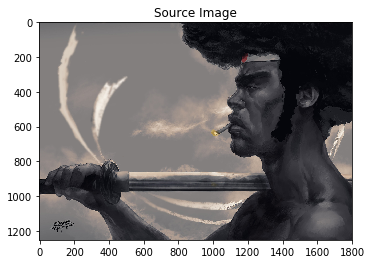

In [24]:
# Display source image 
plt.figure(1)
plt.imshow(src_im)
plt.title('Source Image')
plt.show()

In [10]:
# Save original matrix as a png image          
# misc.imsave('Square.png', src_im) # uses the Image module (PIL)
          
# Create a new matrix to hold another image. This new image will hold the result 
# of the transformation. 
dst_im = np.zeros((M, N, 3), dtype='f')

theta = np.pi/8.0             # Rotation angle   

## Inverse-mapping loop 
To apply the inverse mapping to images, we need to transfer the color of pixels from the source image to the destination image. To do that, we loop over the destination image matrix, which we assume is indexed by $(u,v)$ coordinates. The original image is assumed to be in $(x,y)$ coordinates. For each pixel location $(u,v)$ in the destination image, we calculate the inverse transformation, which gives us a location $(x,y)$ in the original image.

In [26]:
A_inv = np.array([[ 1.16666667e+00, -8.33333333e-02,  3.33333333e+01],
 [ 6.66666667e-01,  1.66666667e+00, -1.26666667e+03],
 [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]]);
for v in range(0,M):
    for u in range(0,N):
        
        # Map the current location on the destination image to the 
        # corresponding location of the original image
        x,y = inverseTransformation(u, v, A_inv)

        # Set the color of (u,v) location to the color of (x,y) location if 
        # (x,y) are valid coordinates.
        if isWithinBoundaries(x, y, M, N): 
            dst_im[v,u,0] = src_im[int(y),int(x),0]    # red component
            dst_im[v,u,1] = src_im[int(y),int(x),1]    # green component
            dst_im[v,u,2] = src_im[int(y),int(x),2]    # blue component 
         
         

## Display resulting image 

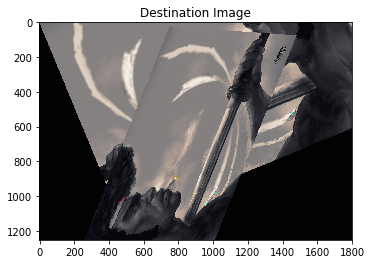

In [27]:
# Display image 
plt.figure(2)
dst_im = 255 - dst_im
plt.imshow(dst_im)
plt.title('Destination Image')
plt.show()

In [20]:
          
# Save rotated matrix as a png image          
misc.imsave('rotatedSquare.png', dst_im) # uses the Image module (PIL)